## Polynomial Interpolation

Polynomial interpolation is a process of finding a polynomial function that precisely passes through a given set of points. This technique is fundamental in various areas of numerical analysis, science, and engineering for approximating functions.

In this lesson, we will explore how to use linear algebra concepts, specifically matrices and vectors, to perform polynomial interpolation. The hope is that this will not only reinforce your understanding of linear algebra but also introduce you to related practical applications.

#### Conceptual Overview

The idea behind polynomial interpolation is straightforward: given a set of $n+1$ distinct points $(x_0,y_0),(x_1,y_1) \cdots (x_n,y_n)$, we aim to find a polynomial of degree $n$ that passes through all these points. The polynomial is typically represented as:

$$P(x) = a_0 + a_1x + a_2x^2 + \cdots + a_nx^n$$

where $a_0, a_1, \ldots, a_n$ are the coefficients we need to determine. Plugging in all $n+1$ points yields the set of equations
$$
\begin{aligned}
    a_0 + a_1x_0 + a_2x_0^2 + \cdots + a_n{x_0}^n &= y_0 \\
    a_0 + a_1x_1 + a_2x_1^2 + \cdots + a_n{x_1}^n &= y_1 \\
    \vdots \\
    a_0 + a_1x_n + a_2x_n^2 + \cdots + a_n{x_n}^n &= y_n \\
\end{aligned}
$$
which can be rewritten as
$$
    \begin{bmatrix}
    1 & x_0 & x_0^2 & \cdots & x_0^n \\
    1 & x_1 & x_1^2 & \cdots & x_1^n \\
    1 & x_2 & x_2^2 & \cdots & x_2^n \\
    \vdots \\
    1 & x_n & x_n^2 & \cdots & x_n^n
    \end{bmatrix}
    \begin{bmatrix}
    a_0 \\ a_1 \\ a_2 \\ \vdots \\ a_n
    \end{bmatrix}
    =
    \begin{bmatrix}
    y_0 \\ y_1 \\ y_2 \\ \vdots \\ y_n
    \end{bmatrix}
$$

Since we know all of the $(x_i,y_i)$ and our goal is to find the values of $a_i$ then this becomes a simple exercise in matrix reduction.

### Question 1

##### Step 1
Consider the points $(1,2),(3,5)$ and $(5,3)$. Use the equation above to construct the appropriate augmented matrix. It should be a 3x4 matrix with each 1x3 row being the powers of the given $x$ values, and the final augmented column being the given $y$ values. Call this matrix $A$.


In [4]:
x0 = 1; 
x1 = 3; 
x2 = 5; 

y0 = 2; 
y1 = 5; 
y2 = 3; 

A = matrix([[1, x0, x0^2, y0], 
           [1, x1, x2^2, y1],
           [1, x2, x2^2, y2]])


##### Step 2

Row reduce the matrix $A$ to deduce the values of $a_0, a_1$ and $a_2$.

In [6]:
x0 = 1; 
x1 = 3; 
x2 = 5; 

y0 = 2; 
y1 = 5; 
y2 = 3; 

A = matrix([[1, x0, x0^2, y0], 
           [1, x1, x1^2, y1],
           [1, x2, x2^2, y2]])


show(A.rref()); 

[    1     0     0 -11/8]
[    0     1     0     4]
[    0     0     1  -5/8]

##### Step 3

Run the cell below which should draw the data points and an INCORRECT function `fcn`. Adjust the coefficients of the function `fcn` based on the prevoius step to make it pass through the given points.


-5/8*x^2 + 4*x - 11/8

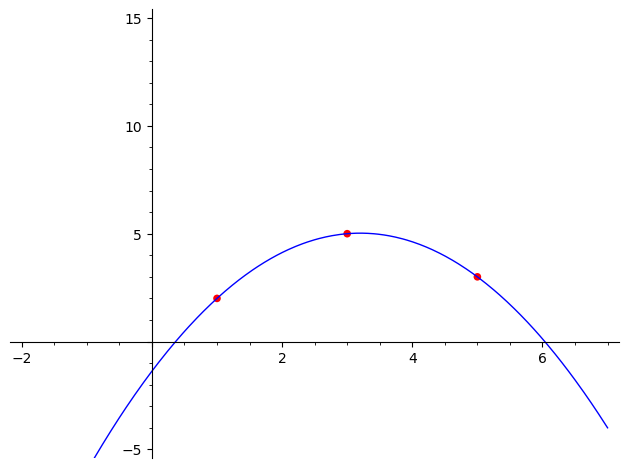

In [11]:
points = [(1, 2), (3, 5), (5, 3)]
fcn = -11/8 + 4*x - 5*(x^2) / 8

point_plot = point(points,size=30,color='red')
fcn_plot = plot(fcn,(x,-2,7),ymin=-5,ymax=15) # (x,-2,7) gives the horizontal view of the plot
show(fcn)
show(point_plot+fcn_plot)

<div style="background-color: lightpink; color:black; padding: 10px">

#### Step 4
Evaluate the polynomial function you found in the previous step when $x = 2$ and **enter your answer for Q1 in the Learn quiz Exercise 3.** You can evaluate by hand or do it directly in code using the command `fcn(x=2)` in the cell below
    
</div>

In [12]:
fcn(x=2)

33/8

---

### Question 2

It is of course possible to let the computer help even further so as to avoid manually eyeballing the coefficients and building a function out of them.

If we have a vector like:

`v = vector([2,4,-1,1/3,5])`

and we want to build a polynomial where the values in `v` correspond to coefficients of x in increasing order then we are essentially wanting to compute:

`fcn = v[0] + v[1]*x + v[2]*x^2 + v[3]*x^3 + v[4]*x^4`

(i.e. $2 + 4x - x^2 + \frac{x^3}{3} + 5x^4$)

Or, using some built-in python commands

`fcn = sum(v[i]*x^i for i in range(len(v)))`  (the `len` function calculates the length of the given vector)

which will allow us to build an arbitrarily sized polynomial fairly easily (based on the vector `v`). Run the code below to see an example of a degree 13 polynomial where all the coefficients are 2.

In [13]:
v = [2]*14
fcn = sum(v[i]*x^i for i in range(len(v)))
show(fcn)

2*x^13 + 2*x^12 + 2*x^11 + 2*x^10 + 2*x^9 + 2*x^8 + 2*x^7 + 2*x^6 + 2*x^5 + 2*x^4 + 2*x^3 + 2*x^2 + 2*x + 2

Now, if we combine this power with the ability to extract the solution vector from a matrix system $A\overrightarrow{v} = \overrightarrow{b}$ then we can build the polynomial fairly easily. That is, consider now a set of 4 points and the corresponding system:


$(-1,3),(2,1),(5,2),(6,-1)$

$$
    \begin{bmatrix}
    1 & -1 & 1 & -1  \\
    1 & 2 & 4 & 8 \\
    1 & 5 & 25 & 125 \\
    1 & 6 & 36 & 216
    \end{bmatrix}
    \begin{bmatrix}
    a_0 \\ a_1 \\ a_2 \\ a_3
    \end{bmatrix}
    =
    \begin{bmatrix}
    3 \\ 1 \\ 2 \\ -1
    \end{bmatrix}
$$

In this case, for a system $A\overrightarrow{v} = \overrightarrow{b}$ the unknown vector $\overrightarrow{v}$ contains the values $(a_0,a_1,a_2,a_3)$. We can solve this using an inverse matrix. That is

$\overrightarrow{v} = A^{-1}\overrightarrow{b}$.

#### Step 1

In the cell below use the given definition of the matrix $A$ and vector $\overrightarrow{b}$, as well as the matrix inverse function, to solve for the coefficient vector $\overrightarrow{v}$. That is, write the portion that goes after $\overrightarrow{v}=$

In [15]:
A = matrix([[1, -1, 1, -1],[ 1, 2, 4, 8],[ 1, 5, 25, 125],[ 1, 6, 36, 216]]) #these are the powers of the x values of the points
b = vector([3,1,2,-1]) # these are the y-values of the points
v = A.inverse() * b; 

show(v); 

(4/7, -53/42, 43/42, -1/7)

#### Step 2

Now use the information given at the beginning of this question to build the polynomial made of the coefficients you found in the previous step.

In [16]:
fcn = sum(v[i]*x^i for i in range(len(v)))
show(fcn)

-1/7*x^3 + 43/42*x^2 - 53/42*x + 4/7

#### Step 3
Copy a similar strategy to Step 3 from question 1 (copy and paste and edit as needed) to plot the points and the function. You may need to change the x-axis range that is displayed.

-1/7*x^3 + 43/42*x^2 - 53/42*x + 4/7

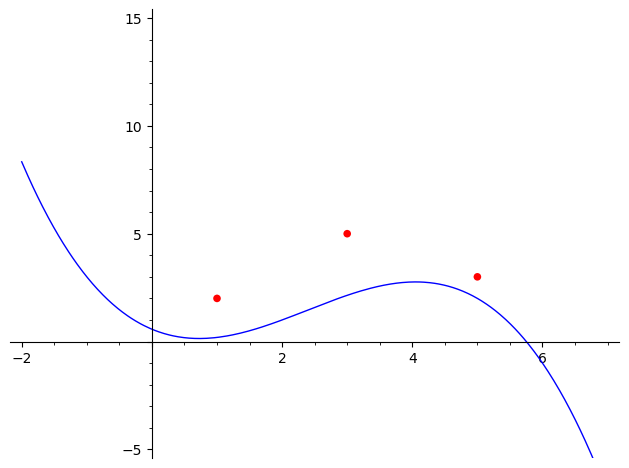

In [19]:
fcn = sum(v[i]*x^i for i in range(len(v)))

point_plot = point(points,size=30,color='red')
fcn_plot = plot(fcn,(x,-2,7),ymin=-5,ymax=15) # (x,-2,7) gives the horizontal view of the plot
show(fcn)
show(point_plot+fcn_plot)

#### Step 4

<div style="background-color: lightpink; color:black; padding: 10px">
    
Evaluate the polynomial just found at $x = 3$ and **enter your answer for Q2 in the Learn quiz Exercise 3.** You can evaluate by hand or do it directly in code using the command `fcn(x=3)` in the cell below
    
</div>

In [22]:
show(fcn(x=3)); 

15/7

---

### Question 3

At this point we know how to build a polynomial function from a set of coefficients stored in a given `v`

`sum(v[i]*x^i for i in range(len(v)))`

We also know how to find the coefficient vector `v` from a matrix system $A\overrightarrow{v} = \overrightarrow{b}$ by solving $\overrightarrow{v} = A^{-1}\overrightarrow{b}$

What we have yet to do is construct the matrix $A$ with code. Up until now we've hardcoded the matrix $A$ by manually computing all of the powers of $x$. The code below will help you accomplish this. To make matters more interesting let's build a list of 21 points (thus requiring a degree 20 polynomial)

#### Step 1

Run the cell below to generate the matrix $A$ and vector $\overrightarrow{b}$

In [32]:
points = [(-5, -6), (7, 1), (4, 5), (-4, 6), (13, 4), (18, -1), (2, -5), (6, 3), (-1, -6), (3, 3), (17, 5), (-11, 4), (-20, 3), (-9, 2), (-7, -3), (-18, 2), (-16, -1), (-8, -3), (-6, -4), (8, -1), (5, -7)]

b = vector([y for x, y in points]) #pull out each y value to make the column vector b
A = matrix([[x**i for i in range(len(points))] for x, y in points]) #compute powers of all x values to generate matrix A

v = A.inverse() * b;
#delete the # symbol below to display the matrix A
show(v); 

(-4913110273273017/532183328001325, 42099623996390977957/38812130111136632250, 19046350536582854034358097/8215751701925402314680000, -126977112688045625102703019/57993541425355781044800000, 195260079080824500726410033/985890204231048277761600000, 5980142320115639933362852127/15774243267696772444185600000, -31954609054907677439046368317/851809136455625711986022400000, -2214808661984496033154179557/82433142237641197934131200000, 325348943604005755726178669/204434192749350170876645376000, 22356369513269658348142709/22944353843922578100633600000, -3299594618853202066237073/146547808422473240771788800000, -11956060542166089601922513/619497553785909608717107200000, -102877910348087884926283/1514327353698890154641817600000, 68918660389203334225753/329732568950564791736524800000, 91428890045103894299981/20443419274935017087664537600000, -1345483064876491355729/1135745515274167615981363200000, -28855476373785282343/757163676849445077320908800000, 22096565165215140601/6814473091645005695888179200000, 1700363357117100847/13628946183290011391776358400000, -13768429386099617/4088683854987003417532907520000, -5819320474220213/40886838549870034175329075200000)

#### Step 2

In the cell below use your previously acquired knowledge to deduce the vector of coefficients $a_0, a_1 \cdots a_{20}$

In [31]:
show(v); 

(-4913110273273017/532183328001325, 42099623996390977957/38812130111136632250, 19046350536582854034358097/8215751701925402314680000, -126977112688045625102703019/57993541425355781044800000, 195260079080824500726410033/985890204231048277761600000, 5980142320115639933362852127/15774243267696772444185600000, -31954609054907677439046368317/851809136455625711986022400000, -2214808661984496033154179557/82433142237641197934131200000, 325348943604005755726178669/204434192749350170876645376000, 22356369513269658348142709/22944353843922578100633600000, -3299594618853202066237073/146547808422473240771788800000, -11956060542166089601922513/619497553785909608717107200000, -102877910348087884926283/1514327353698890154641817600000, 68918660389203334225753/329732568950564791736524800000, 91428890045103894299981/20443419274935017087664537600000, -1345483064876491355729/1135745515274167615981363200000, -28855476373785282343/757163676849445077320908800000, 22096565165215140601/6814473091645005695888179200000, 1700363357117100847/13628946183290011391776358400000, -13768429386099617/4088683854987003417532907520000, -5819320474220213/40886838549870034175329075200000)

#### Step 3

Now, in the cell below, repeat the process from the previous 2 questions (copy and paste step 3 as needed) to plot the points and the polynomial that interpolates them. 

Tips:
- You may need to adjust the view of the plot. Try using `plot(fcn,(x,-20,20),ymin=-10,ymax=10)` (assuming you labeled your polynomial with `fcn`)
- In previous questions we used `show(fcn)` to show the polynomial function itself. It is recommended you do not do that here as it's rather heinous.

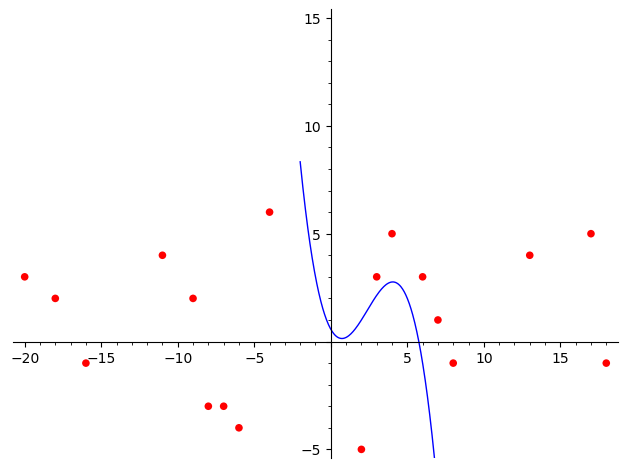

In [35]:
fcn = sum(v[i]*x^i for i in range(len(v)))

point_plot = point(points,size=30,color='red')
plot(fcn,(x,-20,20),ymin=-10,ymax=10)  # (x,-2,7) gives the horizontal view of the plot
#show(fcn)
show(point_plot+fcn_plot)

#### Step 4

<div style="background-color: lightpink; color:black; padding: 10px">

Evaluate the polynomial just found at $x = 9$. Don't do this one by hand, first use `fcn(x=9)` below. You should get a large fraction. To get a decimal you can modify the command to `fcn(x=9).n()`. With that **enter your answer for Q3 up to 2 decimal places in the Learn quiz Exercise 3.** That is, round the answer to nearest hundreth and then enter it in Learn for Q3.
    
</div>

In [36]:
show(fcn(x=9).n()); 

2085.24043594788